# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
weather_api_key

'2f49218104961ee5e02d1d78a2d36453'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        print(response.status_code)
        city_weather = response.json()
        print(response.json())
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e: 
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
200
{'coord': {'lon': 115.0667, 'lat': -33.95}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 14.67, 'feels_like': 13.97, 'temp_min': 14.67, 'temp_max': 14.67, 'pressure': 1023, 'humidity': 68, 'sea_level': 1023, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 8.52, 'deg': 276, 'gust': 12.18}, 'clouds': {'all': 30}, 'dt': 1689890978, 'sys': {'country': 'AU', 'sunrise': 1689895207, 'sunset': 1689931903}, 'timezone': 28800, 'id': 2066981, 'name': 'Margaret River', 'cod': 200}
Processing Record 2 of Set 1 | castillos
200
{'coord': {'lon': -53.8333, 'lat': -34.1667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.11, 'feels_like': 12.77, 'temp_min': 13.11, 'temp_max': 13.11, 'pressure': 1021, 'humidity': 8

200
{'coord': {'lon': 99.1844, 'lat': 58.6881}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 15.46, 'feels_like': 14.73, 'temp_min': 15.46, 'temp_max': 15.46, 'pressure': 1014, 'humidity': 64, 'sea_level': 1014, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 1.11, 'deg': 99, 'gust': 1.03}, 'clouds': {'all': 3}, 'dt': 1689890979, 'sys': {'country': 'RU', 'sunrise': 1689886089, 'sunset': 1689948645}, 'timezone': 25200, 'id': 1503037, 'name': 'Kodinsk', 'cod': 200}
Processing Record 17 of Set 1 | idrinskoye
200
{'coord': {'lon': 92.1358, 'lat': 54.3708}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.17, 'feels_like': 16.72, 'temp_min': 17.17, 'temp_max': 17.17, 'pressure': 1008, 'humidity': 68, 'sea_level': 1008, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 1.04, 'deg': 139, 'gust': 1.3}, 'clouds': {'

200
{'coord': {'lon': -64.7388, 'lat': 17.7397}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.25, 'feels_like': 31.76, 'temp_min': 28.25, 'temp_max': 28.25, 'pressure': 1017, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 50}, 'clouds': {'all': 100}, 'dt': 1689891111, 'sys': {'type': 1, 'id': 8785, 'country': 'VI', 'sunrise': 1689846816, 'sunset': 1689893797}, 'timezone': -14400, 'id': 4796512, 'name': 'Saint Croix', 'cod': 200}
Processing Record 33 of Set 1 | podgornoye
200
{'coord': {'lon': 39.1496, 'lat': 51.735}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.12, 'feels_like': 12.79, 'temp_min': 13.12, 'temp_max': 13.12, 'pressure': 1009, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1689891112, 'sys': {'type': 1, 'id': 9034, 'country': 'RU', 's

200
{'coord': {'lon': 41.7583, 'lat': 22.4333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 28.15, 'feels_like': 26.8, 'temp_min': 28.15, 'temp_max': 28.15, 'pressure': 1007, 'humidity': 18, 'sea_level': 1007, 'grnd_level': 903}, 'visibility': 10000, 'wind': {'speed': 4.34, 'deg': 281, 'gust': 5.28}, 'clouds': {'all': 35}, 'dt': 1689891208, 'sys': {'country': 'SA', 'sunrise': 1689907179, 'sunset': 1689955120}, 'timezone': 10800, 'id': 409993, 'name': 'Al Muwayh', 'cod': 200}
Processing Record 48 of Set 1 | remire-montjoly
200
{'coord': {'lon': -52.2667, 'lat': 4.9167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25.02, 'feels_like': 25.88, 'temp_min': 25.02, 'temp_max': 25.02, 'pressure': 1014, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1689891113, 'sys': {'type': 1

200
{'coord': {'lon': -135.0538, 'lat': 60.7161}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23.28, 'feels_like': 22.6, 'temp_min': 22.95, 'temp_max': 26.12, 'pressure': 1020, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 160}, 'clouds': {'all': 64}, 'dt': 1689890985, 'sys': {'type': 2, 'id': 47668, 'country': 'CA', 'sunrise': 1689854850, 'sunset': 1689919515}, 'timezone': -25200, 'id': 6180550, 'name': 'Whitehorse', 'cod': 200}
Processing Record 11 of Set 2 | holualoa
200
{'coord': {'lon': -155.9522, 'lat': 19.6228}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.09, 'feels_like': 26.09, 'temp_min': 23.47, 'temp_max': 29.37, 'pressure': 1017, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1689891115, 'sys': {'type': 2, 'id': 2002394, 'count

200
{'coord': {'lon': 22.3731, 'lat': 38.525}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 32.48, 'feels_like': 32.26, 'temp_min': 25.29, 'temp_max': 32.62, 'pressure': 1012, 'humidity': 36, 'sea_level': 1012, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 2.07, 'deg': 326, 'gust': 2.22}, 'clouds': {'all': 2}, 'dt': 1689891211, 'sys': {'type': 2, 'id': 2039032, 'country': 'GR', 'sunrise': 1689909750, 'sunset': 1689961854}, 'timezone': 10800, 'id': 265187, 'name': 'Amfissa', 'cod': 200}
Processing Record 26 of Set 2 | sanctuary point
200
{'coord': {'lon': 150.629, 'lat': -35.1114}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 12.91, 'feels_like': 12.01, 'temp_min': 12.89, 'temp_max': 13.75, 'pressure': 1015, 'humidity': 67, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3.51, 'deg'

200
{'coord': {'lon': -154.9731, 'lat': 19.5933}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.95, 'feels_like': 25.95, 'temp_min': 24.39, 'temp_max': 26.13, 'pressure': 1019, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 330}, 'clouds': {'all': 100}, 'dt': 1689890988, 'sys': {'type': 2, 'id': 2079676, 'country': 'US', 'sunrise': 1689868286, 'sunset': 1689915641}, 'timezone': -36000, 'id': 5855809, 'name': 'Hawaiian Paradise Park', 'cod': 200}
Processing Record 41 of Set 2 | kerikeri
200
{'coord': {'lon': 173.9474, 'lat': -35.2268}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 11.62, 'feels_like': 11.34, 'temp_min': 11.62, 'temp_max': 11.62, 'pressure': 1001, 'humidity': 96}, 'visibility': 10000, 'wind': {'speed': 1.05, 'deg': 257, 'gust': 1.38}, 'clouds': {'all': 19}, 'dt': 1689891212, 'sys': {'typ

200
{'coord': {'lon': -52.7813, 'lat': 47.5166}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 25.49, 'feels_like': 25.97, 'temp_min': 21.7, 'temp_max': 27.19, 'pressure': 1017, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 250, 'gust': 10.8}, 'clouds': {'all': 40}, 'dt': 1689890713, 'sys': {'type': 1, 'id': 998, 'country': 'CA', 'sunrise': 1689839642, 'sunset': 1689895230}, 'timezone': -9000, 'id': 6082231, 'name': 'Mount Pearl', 'cod': 200}
Processing Record 6 of Set 3 | kolonia town
200
{'coord': {'lon': 158.206, 'lat': 6.964}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26, 'feels_like': 26, 'temp_min': 26, 'temp_max': 26.06, 'pressure': 1013, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 110}, 'clouds': {'all': 100}, 'dt': 1689891214, 'sys': {'type': 1, 'id': 7907, 'c

200
{'coord': {'lon': 57.5281, 'lat': 65.9939}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.2, 'feels_like': 17.17, 'temp_min': 17.2, 'temp_max': 17.2, 'pressure': 995, 'humidity': 84, 'sea_level': 995, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 3.52, 'deg': 216, 'gust': 3.58}, 'clouds': {'all': 52}, 'dt': 1689891217, 'sys': {'country': 'RU', 'sunrise': 1689890963, 'sunset': 1689963767}, 'timezone': 10800, 'id': 863061, 'name': 'Usinsk', 'cod': 200}
Processing Record 21 of Set 3 | rio grande
200
{'coord': {'lon': -52.0986, 'lat': -32.035}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 14.97, 'feels_like': 15.03, 'temp_min': 14.97, 'temp_max': 15.06, 'pressure': 1023, 'humidity': 96, 'sea_level': 1023, 'grnd_level': 1022}, 'visibility': 3295, 'wind': {'speed': 3.98, 'deg': 18, 'gust': 7.27}, 'rain': {'1h': 0.4

200
{'coord': {'lon': -76.6308, 'lat': -12.6581}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 21, 'feels_like': 21.09, 'temp_min': 21, 'temp_max': 21, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 3.18, 'deg': 197, 'gust': 2.63}, 'clouds': {'all': 11}, 'dt': 1689891218, 'sys': {'country': 'PE', 'sunrise': 1689852509, 'sunset': 1689893812}, 'timezone': -18000, 'id': 3935572, 'name': 'Mala', 'cod': 200}
Processing Record 36 of Set 3 | sathupalli
200
{'coord': {'lon': 80.869, 'lat': 17.2497}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.46, 'feels_like': 25.26, 'temp_min': 24.46, 'temp_max': 24.46, 'pressure': 1001, 'humidity': 88, 'sea_level': 1001, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 5.59, 'deg': 273, 'gust': 13.26}, 'clouds': {'all

404
{'cod': '404', 'message': 'city not found'}
'coord'
City not found. Skipping...
Processing Record 1 of Set 4 | gunupur
200
{'coord': {'lon': 83.8167, 'lat': 19.0833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.04, 'feels_like': 26.13, 'temp_min': 25.04, 'temp_max': 25.04, 'pressure': 998, 'humidity': 97, 'sea_level': 998, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 0.66, 'deg': 350, 'gust': 0.73}, 'clouds': {'all': 99}, 'dt': 1689891220, 'sys': {'country': 'IN', 'sunrise': 1689897437, 'sunset': 1689944673}, 'timezone': 19800, 'id': 1270667, 'name': 'Gunupur', 'cod': 200}
Processing Record 2 of Set 4 | bovril
200
{'coord': {'lon': -59.4451, 'lat': -31.3431}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 16.06, 'feels_like': 15.76, 'temp_min': 16.06, 'temp_max': 16.06, 'pressure': 1015, 'humidity'

200
{'coord': {'lon': 26.214, 'lat': -29.1211}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 6.71, 'feels_like': 4.18, 'temp_min': 6.71, 'temp_max': 6.71, 'pressure': 1031, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1689891221, 'sys': {'type': 1, 'id': 1884, 'country': 'ZA', 'sunrise': 1689915924, 'sunset': 1689953837}, 'timezone': 7200, 'id': 1018725, 'name': 'Bloemfontein', 'cod': 200}
Processing Record 19 of Set 4 | colonia
200
{'coord': {'lon': 6.95, 'lat': 50.9333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 16.6, 'feels_like': 16.4, 'temp_min': 14.87, 'temp_max': 18.25, 'pressure': 1014, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 340}, 'rain': {'1h': 0.51}, 'clouds': {'all': 0}, 'dt': 1689890994, 'sys': {'type': 2, 'id': 2000227, 'co

200
{'coord': {'lon': 140.5089, 'lat': 42.9744}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.75, 'feels_like': 21, 'temp_min': 20.75, 'temp_max': 20.75, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 1.85, 'deg': 135, 'gust': 2.39}, 'clouds': {'all': 10}, 'dt': 1689891223, 'sys': {'country': 'JP', 'sunrise': 1689880615, 'sunset': 1689934281}, 'timezone': 32400, 'id': 2129868, 'name': 'Iwanai', 'cod': 200}
Processing Record 34 of Set 4 | masterton
200
{'coord': {'lon': 175.6575, 'lat': -40.9597}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.49, 'feels_like': 9.32, 'temp_min': 10.49, 'temp_max': 10.49, 'pressure': 1019, 'humidity': 66, 'sea_level': 1019, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 5.03, 'deg': 133, 'gust': 10.42}, 'clouds':

200
{'coord': {'lon': 123.0595, 'lat': 0.5412}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23.69, 'feels_like': 24.54, 'temp_min': 23.69, 'temp_max': 23.69, 'pressure': 1011, 'humidity': 93, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.85, 'deg': 112, 'gust': 2.96}, 'clouds': {'all': 7}, 'dt': 1689890973, 'sys': {'country': 'ID', 'sunrise': 1689889775, 'sunset': 1689933498}, 'timezone': 28800, 'id': 1643837, 'name': 'Gorontalo', 'cod': 200}
Processing Record 49 of Set 4 | college
200
{'coord': {'lon': -147.8028, 'lat': 64.8569}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 18.33, 'feels_like': 18.52, 'temp_min': 17.11, 'temp_max': 19.49, 'pressure': 1019, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 100}, 'rain': {'1h': 0.31}, 'clouds': {'all': 100}, 'dt': 1689890998, 'sy

200
{'coord': {'lon': 145.701, 'lat': 15.1355}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 29.25, 'feels_like': 36.25, 'temp_min': 29.25, 'temp_max': 29.39, 'pressure': 1013, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1689891000, 'sys': {'type': 2, 'id': 2024687, 'country': 'MP', 'sunrise': 1689882979, 'sunset': 1689929425}, 'timezone': 36000, 'id': 4041552, 'name': 'Saipan', 'cod': 200}
Processing Record 14 of Set 5 | antsiranana
200
{'coord': {'lon': 49.2917, 'lat': -12.2787}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.2, 'feels_like': 24.74, 'temp_min': 24.2, 'temp_max': 24.2, 'pressure': 1018, 'humidity': 79, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.46, 'deg': 136, 'gust': 11.25}, 'clouds': {'all': 100}, 'd

200
{'coord': {'lon': -6.3865, 'lat': 58.2093}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.28, 'feels_like': 10.53, 'temp_min': 9.98, 'temp_max': 11.72, 'pressure': 1012, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 280}, 'clouds': {'all': 78}, 'dt': 1689890965, 'sys': {'type': 2, 'id': 2030073, 'country': 'GB', 'sunrise': 1689825159, 'sunset': 1689887443}, 'timezone': 3600, 'id': 2636790, 'name': 'Stornoway', 'cod': 200}
Processing Record 29 of Set 5 | kogalym
200
{'coord': {'lon': 74.4791, 'lat': 62.2654}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.27, 'feels_like': 18.82, 'temp_min': 19.27, 'temp_max': 19.27, 'pressure': 1001, 'humidity': 60, 'sea_level': 1001, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 3.47, 'deg': 135, 'gust': 4.05}, 'clouds': {'all': 100}, 'dt': 168

200
{'coord': {'lon': 135.8667, 'lat': -34.7333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 11.24, 'feels_like': 10.14, 'temp_min': 11.24, 'temp_max': 11.24, 'pressure': 1024, 'humidity': 66, 'sea_level': 1024, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 2.89, 'deg': 280, 'gust': 4.22}, 'clouds': {'all': 47}, 'dt': 1689891004, 'sys': {'country': 'AU', 'sunrise': 1689890321, 'sunset': 1689926805}, 'timezone': 34200, 'id': 2063036, 'name': 'Port Lincoln', 'cod': 200}
Processing Record 44 of Set 5 | mount isa
200
{'coord': {'lon': 139.5, 'lat': -20.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.87, 'feels_like': 17.15, 'temp_min': 17.87, 'temp_max': 17.87, 'pressure': 1019, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1689891229, 'sys': {'type'

200
{'coord': {'lon': -64.4819, 'lat': 48.8334}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.95, 'feels_like': 15.32, 'temp_min': 15.95, 'temp_max': 15.95, 'pressure': 1014, 'humidity': 66, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.05, 'deg': 119, 'gust': 2.01}, 'clouds': {'all': 61}, 'dt': 1689891056, 'sys': {'type': 1, 'id': 475, 'country': 'CA', 'sunrise': 1689842144, 'sunset': 1689898345}, 'timezone': -14400, 'id': 5959878, 'name': 'Gaspé', 'cod': 200}
Processing Record 12 of Set 6 | manakara
200
{'coord': {'lon': 48.0167, 'lat': -22.1333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.57, 'feels_like': 19.98, 'temp_min': 19.57, 'temp_max': 19.57, 'pressure': 1024, 'humidity': 92, 'sea_level': 1024, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 1.15, 'deg': 272, 'gu

200
{'coord': {'lon': 90.2467, 'lat': 54.0033}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 16.26, 'feels_like': 16.32, 'temp_min': 16.26, 'temp_max': 16.26, 'pressure': 1009, 'humidity': 91, 'sea_level': 1009, 'grnd_level': 927}, 'visibility': 10000, 'wind': {'speed': 1.17, 'deg': 240, 'gust': 1.34}, 'rain': {'1h': 0.19}, 'clouds': {'all': 100}, 'dt': 1689891232, 'sys': {'country': 'RU', 'sunrise': 1689890016, 'sunset': 1689949007}, 'timezone': 25200, 'id': 1491360, 'name': 'Sorsk', 'cod': 200}
Processing Record 27 of Set 6 | belomorsk
200
{'coord': {'lon': 34.7668, 'lat': 64.5232}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.88, 'feels_like': 11.34, 'temp_min': 11.88, 'temp_max': 11.88, 'pressure': 994, 'humidity': 85, 'sea_level': 994, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 5.87, 'deg': 20, 'gust':

200
{'coord': {'lon': 115.28, 'lat': -8.3862}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 18, 'feels_like': 18.1, 'temp_min': 18, 'temp_max': 18, 'pressure': 1015, 'humidity': 86, 'sea_level': 1015, 'grnd_level': 944}, 'visibility': 10000, 'wind': {'speed': 0.84, 'deg': 155, 'gust': 2.67}, 'clouds': {'all': 44}, 'dt': 1689891134, 'sys': {'country': 'ID', 'sunrise': 1689892450, 'sunset': 1689934557}, 'timezone': 28800, 'id': 1622846, 'name': 'Taro', 'cod': 200}
Processing Record 42 of Set 6 | crane
200
{'coord': {'lon': -102.3501, 'lat': 31.3974}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 37.95, 'feels_like': 36, 'temp_min': 37.95, 'temp_max': 37.95, 'pressure': 1012, 'humidity': 17, 'sea_level': 1012, 'grnd_level': 929}, 'visibility': 10000, 'wind': {'speed': 7.97, 'deg': 144, 'gust': 7.98}, 'clouds': {'all': 100

200
{'coord': {'lon': 124.7333, 'lat': 52.3333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 15.84, 'feels_like': 15.02, 'temp_min': 15.84, 'temp_max': 15.84, 'pressure': 1013, 'humidity': 59, 'sea_level': 1013, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 1.24, 'deg': 229, 'gust': 1.76}, 'clouds': {'all': 43}, 'dt': 1689891235, 'sys': {'country': 'CN', 'sunrise': 1689882241, 'sunset': 1689940228}, 'timezone': 28800, 'id': 2034615, 'name': 'Tahe', 'cod': 200}
Processing Record 7 of Set 7 | oriximina
200
{'coord': {'lon': -55.8661, 'lat': -1.7656}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 29.34, 'feels_like': 30.11, 'temp_min': 29.34, 'temp_max': 29.34, 'pressure': 1011, 'humidity': 50, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.35, 'deg': 150, 'gust': 1.43}, 'clouds'

200
{'coord': {'lon': 110.3333, 'lat': 1.55}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 24.37, 'feels_like': 25.34, 'temp_min': 22.9, 'temp_max': 26.12, 'pressure': 1009, 'humidity': 95}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1689891236, 'sys': {'type': 2, 'id': 2083980, 'country': 'MY', 'sunrise': 1689892738, 'sunset': 1689936644}, 'timezone': 28800, 'id': 1735634, 'name': 'Kuching', 'cod': 200}
Processing Record 22 of Set 7 | lata
200
{'coord': {'lon': -8.3327, 'lat': 40.1629}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.48, 'feels_like': 14.54, 'temp_min': 14.48, 'temp_max': 14.48, 'pressure': 1019, 'humidity': 98, 'sea_level': 1019, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 1.2, 'deg': 308, 'gust': 2.99}, 'clouds': {'all': 6}, 'dt': 1689891237, 'sys': {'c

200
{'coord': {'lon': 155.5367, 'lat': -6.2132}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.42, 'feels_like': 31.18, 'temp_min': 27.42, 'temp_max': 27.42, 'pressure': 1013, 'humidity': 84, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.49, 'deg': 216, 'gust': 2.5}, 'rain': {'1h': 0.41}, 'clouds': {'all': 67}, 'dt': 1689891238, 'sys': {'country': 'PG', 'sunrise': 1689882591, 'sunset': 1689925093}, 'timezone': 39600, 'id': 2100633, 'name': 'Arawa', 'cod': 200}
Processing Record 37 of Set 7 | igarka
200
{'coord': {'lon': 86.5833, 'lat': 67.4667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 16.09, 'feels_like': 16.29, 'temp_min': 16.09, 'temp_max': 16.09, 'pressure': 1006, 'humidity': 97, 'sea_level': 1006, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 5.33, 'deg': 167, 'gust': 10.15

200
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21.03, 'feels_like': 20.96, 'temp_min': 19.45, 'temp_max': 21.03, 'pressure': 1010, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1689891016, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sunrise': 1689852508, 'sunset': 1689893614}, 'timezone': -18000, 'id': 3932145, 'name': 'Pisco', 'cod': 200}
Processing Record 2 of Set 8 | harstad
200
{'coord': {'lon': 16.5293, 'lat': 68.799}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 11.13, 'feels_like': 10.91, 'temp_min': 10.9, 'temp_max': 14.34, 'pressure': 1002, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 3.13, 'deg': 13, 'gust': 4.02}, 'clouds': {'all': 42}, 'dt': 1689891240, 'sys': {'type': 2, 'id': 2012184, 'country'

200
{'coord': {'lon': -14.4164, 'lat': 19.6969}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.33, 'feels_like': 30.76, 'temp_min': 30.33, 'temp_max': 30.33, 'pressure': 1010, 'humidity': 45, 'sea_level': 1010, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 9.4, 'deg': 261, 'gust': 11.65}, 'clouds': {'all': 99}, 'dt': 1689891241, 'sys': {'country': 'MR', 'sunrise': 1689834533, 'sunset': 1689881924}, 'timezone': 0, 'id': 2381690, 'name': 'Akjoujt', 'cod': 200}
Processing Record 17 of Set 8 | new norfolk
200
{'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 4.84, 'feels_like': 4.84, 'temp_min': 2.72, 'temp_max': 4.84, 'pressure': 1015, 'humidity': 96, 'sea_level': 1015, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.31, 'deg': 279, 'gust': 1.18}, 'clo

200
{'coord': {'lon': 0.7531, 'lat': 14.0078}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 34.65, 'feels_like': 36.02, 'temp_min': 34.65, 'temp_max': 34.65, 'pressure': 1010, 'humidity': 38, 'sea_level': 1010, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 5.83, 'deg': 205, 'gust': 8.18}, 'clouds': {'all': 56}, 'dt': 1689891243, 'sys': {'country': 'NE', 'sunrise': 1689831467, 'sunset': 1689877708}, 'timezone': 3600, 'id': 2438855, 'name': 'Téra', 'cod': 200}
Processing Record 34 of Set 8 | rawai
200
{'coord': {'lon': 98.3253, 'lat': 7.7797}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.99, 'feels_like': 36.01, 'temp_min': 28.06, 'temp_max': 29.99, 'pressure': 1008, 'humidity': 74, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 7.4, 'deg': 276, 'gust': 9.02}, 'clouds': {'all

200
{'coord': {'lon': 120.4264, 'lat': 60.3736}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.97, 'feels_like': 14.98, 'temp_min': 14.97, 'temp_max': 14.97, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 1.93, 'deg': 233, 'gust': 4}, 'clouds': {'all': 100}, 'dt': 1689891245, 'sys': {'country': 'RU', 'sunrise': 1689880158, 'sunset': 1689944379}, 'timezone': 32400, 'id': 2018571, 'name': 'Olyokminsk', 'cod': 200}
Processing Record 0 of Set 9 | paita
200
{'coord': {'lon': -81.1144, 'lat': -5.0892}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23.17, 'feels_like': 23.55, 'temp_min': 23.17, 'temp_max': 23.17, 'pressure': 1008, 'humidity': 77, 'sea_level': 1008, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 7.82, 'deg': 200, 'gust': 8.9}, 'clouds': {'

404
{'cod': '404', 'message': 'city not found'}
'coord'
City not found. Skipping...
Processing Record 16 of Set 9 | namdrik
200
{'coord': {'lon': 168.1028, 'lat': 5.5994}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.04, 'feels_like': 32.2, 'temp_min': 28.04, 'temp_max': 28.04, 'pressure': 1011, 'humidity': 80, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.63, 'deg': 96, 'gust': 10.17}, 'clouds': {'all': 100}, 'dt': 1689891247, 'sys': {'country': 'MH', 'sunrise': 1689878504, 'sunset': 1689923147}, 'timezone': 43200, 'id': 7306522, 'name': 'Namdrik', 'cod': 200}
Processing Record 17 of Set 9 | eilenburg
200
{'coord': {'lon': 12.6334, 'lat': 51.4598}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.6, 'feels_like': 14.52, 'temp_min': 13.25, 'temp_max': 16.18, 'pressure': 1014, 'humid

200
{'coord': {'lon': 117.0645, 'lat': 7.9868}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.93, 'feels_like': 30.05, 'temp_min': 26.93, 'temp_max': 26.93, 'pressure': 1008, 'humidity': 85, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 3619, 'wind': {'speed': 6.42, 'deg': 218, 'gust': 9.26}, 'clouds': {'all': 100}, 'dt': 1689891249, 'sys': {'country': 'PH', 'sunrise': 1689890535, 'sunset': 1689935616}, 'timezone': 28800, 'id': 1728675, 'name': 'Balabac', 'cod': 200}
Processing Record 32 of Set 9 | alesund
200
{'coord': {'lon': 6.1549, 'lat': 62.4723}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.97, 'feels_like': 11.65, 'temp_min': 11.08, 'temp_max': 13.84, 'pressure': 1005, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1689891249, 'sys': {'type': 1,

200
{'coord': {'lon': 138.95, 'lat': 34.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.5, 'feels_like': 25.17, 'temp_min': 24.5, 'temp_max': 24.5, 'pressure': 1013, 'humidity': 83, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.39, 'deg': 46, 'gust': 7.06}, 'clouds': {'all': 96}, 'dt': 1689891251, 'sys': {'type': 2, 'id': 2019346, 'country': 'JP', 'sunrise': 1689882337, 'sunset': 1689933308}, 'timezone': 32400, 'id': 1852357, 'name': 'Shimoda', 'cod': 200}
Processing Record 47 of Set 9 | mokhsogollokh
200
{'coord': {'lon': 128.9203, 'lat': 61.4681}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.05, 'feels_like': 11.79, 'temp_min': 12.05, 'temp_max': 12.05, 'pressure': 1008, 'humidity': 95, 'sea_level': 1008, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 2.45, 'de

200
{'coord': {'lon': -9.0167, 'lat': 9.2667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22.16, 'feels_like': 22.91, 'temp_min': 22.16, 'temp_max': 22.16, 'pressure': 1015, 'humidity': 95, 'sea_level': 1015, 'grnd_level': 955}, 'visibility': 10000, 'wind': {'speed': 0.66, 'deg': 203, 'gust': 0.7}, 'rain': {'1h': 0.28}, 'clouds': {'all': 99}, 'dt': 1689891253, 'sys': {'country': 'GN', 'sunrise': 1689834267, 'sunset': 1689879598}, 'timezone': 0, 'id': 2419622, 'name': 'Kérouané', 'cod': 200}
Processing Record 11 of Set 10 | alamosa
200
{'coord': {'lon': -105.87, 'lat': 37.4695}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.99, 'feels_like': 29.78, 'temp_min': 31.99, 'temp_max': 31.99, 'pressure': 1025, 'humidity': 15}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 250, 'gust': 12.35}, 'clouds': {'all': 75}, 'dt': 1689

200
{'coord': {'lon': -76.726, 'lat': 34.7229}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29.75, 'feels_like': 36.75, 'temp_min': 28.32, 'temp_max': 32.23, 'pressure': 1014, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1689891028, 'sys': {'type': 2, 'id': 2035286, 'country': 'US', 'sunrise': 1689847675, 'sunset': 1689898692}, 'timezone': -14400, 'id': 4480153, 'name': 'Morehead City', 'cod': 200}
Processing Record 26 of Set 10 | sarakhs
200
{'coord': {'lon': 61.1577, 'lat': 36.5449}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 27.72, 'feels_like': 26.85, 'temp_min': 27.72, 'temp_max': 27.72, 'pressure': 1009, 'humidity': 29, 'sea_level': 1009, 'grnd_level': 978}, 'visibility': 10000, 'wind': {'speed': 3.11, 'deg': 3, 'gust': 4.16}, 'clouds': {'all': 0}, 'dt': 1689891255, 

200
{'coord': {'lon': -173.9833, 'lat': -18.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.38, 'feels_like': 26.14, 'temp_min': 25.38, 'temp_max': 25.38, 'pressure': 1008, 'humidity': 83}, 'visibility': 8000, 'wind': {'speed': 8.75, 'deg': 40, 'gust': 19.03}, 'clouds': {'all': 100}, 'dt': 1689891257, 'sys': {'type': 1, 'id': 7292, 'country': 'TO', 'sunrise': 1689962838, 'sunset': 1690003022}, 'timezone': 46800, 'id': 4032420, 'name': 'Neiafu', 'cod': 200}
Processing Record 43 of Set 10 | federal
200
{'coord': {'lon': -58.7833, 'lat': -30.9547}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 14.68, 'feels_like': 14.42, 'temp_min': 14.68, 'temp_max': 14.68, 'pressure': 1016, 'humidity': 85, 'sea_level': 1016, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.28, 'deg': 46, 'gust': 10.22}, 'clouds': {'all': 20}, 'dt':

200
{'coord': {'lon': 134.7173, 'lat': 8.0823}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.65, 'feels_like': 33.59, 'temp_min': 28.65, 'temp_max': 28.65, 'pressure': 1010, 'humidity': 79, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 7.96, 'deg': 228, 'gust': 9.14}, 'clouds': {'all': 100}, 'dt': 1689891259, 'sys': {'country': 'PW', 'sunrise': 1689886289, 'sunset': 1689931388}, 'timezone': 32400, 'id': 7670994, 'name': 'Kayangel', 'cod': 200}
Processing Record 7 of Set 11 | qulsary
200
{'coord': {'lon': 54.0198, 'lat': 46.9531}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.24, 'feels_like': 24.57, 'temp_min': 24.24, 'temp_max': 24.24, 'pressure': 1011, 'humidity': 71, 'sea_level': 1011, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 1.81, 'deg': 141, 'gust': 1.88}, 'clouds'

200
{'coord': {'lon': 17.0933, 'lat': 38.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 28.17, 'feels_like': 28.2, 'temp_min': 28.17, 'temp_max': 28.17, 'pressure': 1009, 'humidity': 45, 'sea_level': 1009, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 307, 'gust': 4.34}, 'clouds': {'all': 0}, 'dt': 1689891261, 'sys': {'country': 'IT', 'sunrise': 1689910949, 'sunset': 1689963190}, 'timezone': 7200, 'id': 2524495, 'name': 'Isola di Capo Rizzuto', 'cod': 200}
Processing Record 21 of Set 11 | inhambane
200
{'coord': {'lon': 35.3833, 'lat': -23.865}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.65, 'feels_like': 19.47, 'temp_min': 19.65, 'temp_max': 19.65, 'pressure': 1030, 'humidity': 69, 'sea_level': 1030, 'grnd_level': 1029}, 'visibility': 10000, 'wind': {'speed': 8.58, 'deg': 145, 'gust': 11.97}, 'rain'

200
{'coord': {'lon': 143.2092, 'lat': -9.0763}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.2, 'feels_like': 25.76, 'temp_min': 25.2, 'temp_max': 25.2, 'pressure': 1014, 'humidity': 76, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.94, 'deg': 124, 'gust': 7.29}, 'clouds': {'all': 95}, 'dt': 1689891153, 'sys': {'country': 'PG', 'sunrise': 1689885811, 'sunset': 1689927790}, 'timezone': 36000, 'id': 2098329, 'name': 'Daru', 'cod': 200}
Processing Record 35 of Set 11 | sao gabriel da cachoeira
200
{'coord': {'lon': -67.0892, 'lat': -0.1303}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.65, 'feels_like': 30.48, 'temp_min': 27.65, 'temp_max': 27.65, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 1.29, 'deg': 166, 'gust'

200
{'coord': {'lon': 32.2455, 'lat': 40.2105}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22.67, 'feels_like': 22.35, 'temp_min': 22.5, 'temp_max': 22.67, 'pressure': 1011, 'humidity': 52, 'sea_level': 1011, 'grnd_level': 930}, 'visibility': 10000, 'wind': {'speed': 2.42, 'deg': 10, 'gust': 2.25}, 'clouds': {'all': 0}, 'dt': 1689891264, 'sys': {'type': 1, 'id': 6951, 'country': 'TR', 'sunrise': 1689907104, 'sunset': 1689959761}, 'timezone': 10800, 'id': 746497, 'name': 'Güdül', 'cod': 200}
Processing Record 0 of Set 12 | flying fish cove
200
{'coord': {'lon': 105.6791, 'lat': -10.4217}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.82, 'feels_like': 24.42, 'temp_min': 23.82, 'temp_max': 23.82, 'pressure': 1015, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 168989126

200
{'coord': {'lon': -82.4331, 'lat': 49.4169}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 23, 'feels_like': 22.74, 'temp_min': 23, 'temp_max': 23.05, 'pressure': 1011, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 90}, 'rain': {'1h': 0.27}, 'clouds': {'all': 75}, 'dt': 1689891156, 'sys': {'type': 1, 'id': 660, 'country': 'CA', 'sunrise': 1689846312, 'sunset': 1689902794}, 'timezone': -14400, 'id': 5989403, 'name': 'Kapuskasing', 'cod': 200}
Processing Record 16 of Set 12 | howard springs
200
{'coord': {'lon': 131.047, 'lat': -12.497}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 20.29, 'feels_like': 19.76, 'temp_min': 18.79, 'temp_max': 20.95, 'pressure': 1015, 'humidity': 53, 'sea_level': 1015, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.44, 'deg': 103, 'gust': 4.07}, 'clouds': {

200
{'coord': {'lon': 77.8167, 'lat': 12.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.95, 'feels_like': 22.34, 'temp_min': 21.95, 'temp_max': 21.95, 'pressure': 1007, 'humidity': 82, 'sea_level': 1007, 'grnd_level': 908}, 'visibility': 10000, 'wind': {'speed': 8.46, 'deg': 264, 'gust': 17.26}, 'clouds': {'all': 97}, 'dt': 1689891268, 'sys': {'type': 1, 'id': 9205, 'country': 'IN', 'sunrise': 1689899510, 'sunset': 1689945480}, 'timezone': 19800, 'id': 1269934, 'name': 'Hosūr', 'cod': 200}
Processing Record 34 of Set 12 | hayma'
404
{'cod': '404', 'message': 'city not found'}
'coord'
City not found. Skipping...
Processing Record 35 of Set 12 | tadine
200
{'coord': {'lon': 167.8833, 'lat': -21.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21.28, 'feels_like': 21.03, 'temp_min': 21.28, 'temp_max': 21.28, 'pressure':

200
{'coord': {'lon': 163.0078, 'lat': 5.3248}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.05, 'feels_like': 32.22, 'temp_min': 28.05, 'temp_max': 28.05, 'pressure': 1011, 'humidity': 80, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 9.23, 'deg': 128, 'gust': 11.15}, 'rain': {'1h': 0.38}, 'clouds': {'all': 100}, 'dt': 1689891200, 'sys': {'country': 'FM', 'sunrise': 1689879752, 'sunset': 1689924345}, 'timezone': 39600, 'id': 2081342, 'name': 'Tofol', 'cod': 200}
Processing Record 0 of Set 13 | dhidhdhoo
200
{'coord': {'lon': 73.1, 'lat': 6.8833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.16, 'feels_like': 32.5, 'temp_min': 28.16, 'temp_max': 28.16, 'pressure': 1009, 'humidity': 80, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 289, 'gust':

404
{'cod': '404', 'message': 'city not found'}
'coord'
City not found. Skipping...
Processing Record 15 of Set 13 | adrar
200
{'coord': {'lon': -10.0711, 'lat': 20.5022}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 36.8, 'feels_like': 33.81, 'temp_min': 36.8, 'temp_max': 36.8, 'pressure': 1007, 'humidity': 7, 'sea_level': 1007, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 3.11, 'deg': 13, 'gust': 3.23}, 'clouds': {'all': 0}, 'dt': 1689891271, 'sys': {'country': 'MR', 'sunrise': 1689833405, 'sunset': 1689880966}, 'timezone': 0, 'id': 2381972, 'name': 'Adrar', 'cod': 200}
Processing Record 16 of Set 13 | alice springs
200
{'coord': {'lon': 133.8833, 'lat': -23.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 7.75, 'feels_like': 5.75, 'temp_min': 7.75, 'temp_max': 7.75, 'pressure': 1025, 'humidity': 81}, 'visibility': 1

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,14.67,68,30,8.52,AU,1689890978
1,castillos,-34.1667,-53.8333,13.11,88,99,4.14,UY,1689890978
2,iqaluit,63.7506,-68.5145,4.85,100,100,3.09,CA,1689890978
3,adamstown,-25.0660,-130.1015,22.30,86,100,17.86,PN,1689890978
4,longyearbyen,78.2186,15.6401,10.91,71,20,8.23,SJ,1689890978


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,14.67,68,30,8.52,AU,1689890978
1,castillos,-34.1667,-53.8333,13.11,88,99,4.14,UY,1689890978
2,iqaluit,63.7506,-68.5145,4.85,100,100,3.09,CA,1689890978
3,adamstown,-25.0660,-130.1015,22.30,86,100,17.86,PN,1689890978
4,longyearbyen,78.2186,15.6401,10.91,71,20,8.23,SJ,1689890978


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

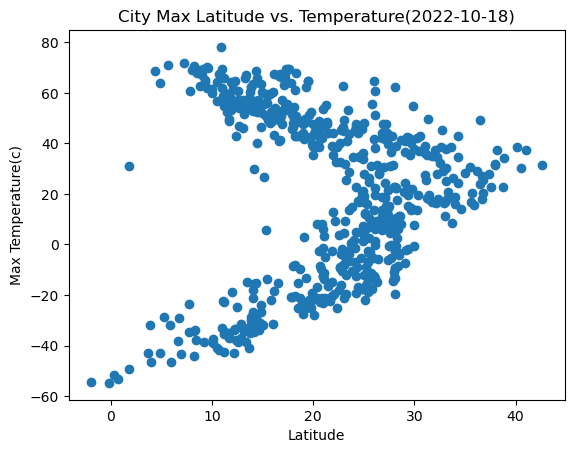

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"],city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(c)")
plt.title("City Max Latitude vs. Temperature(2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

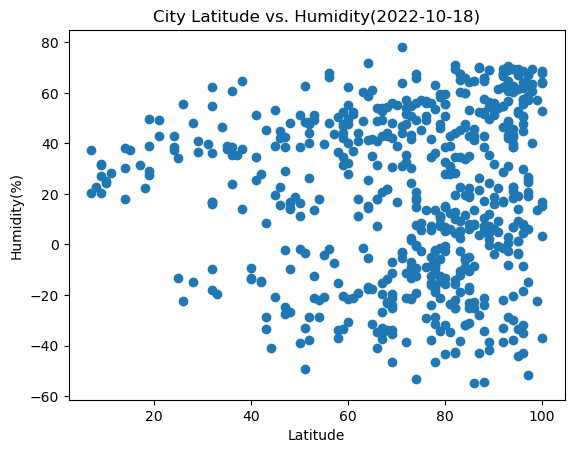

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"],city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity(2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

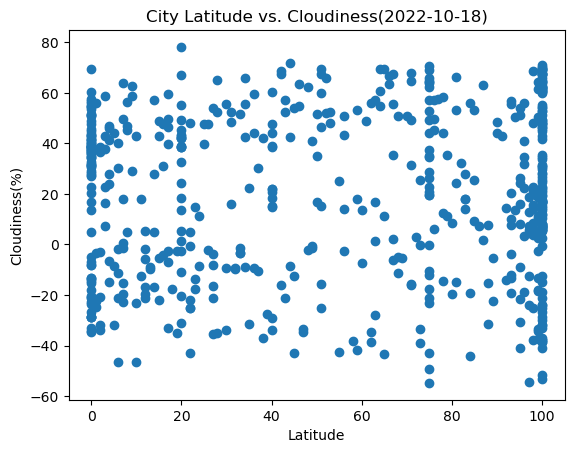

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"],city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness(2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

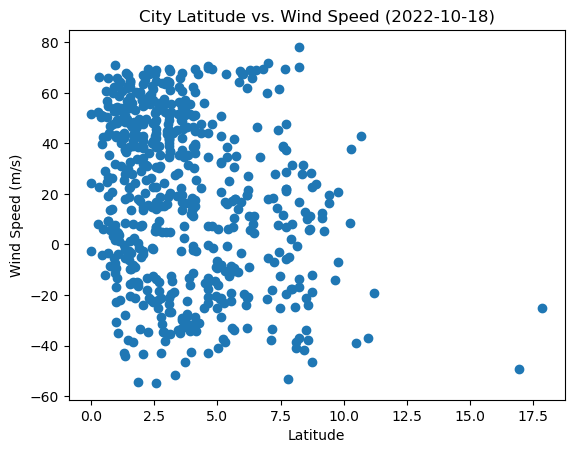

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"],city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iqaluit,63.7506,-68.5145,4.85,100,100,3.09,CA,1689890978
4,longyearbyen,78.2186,15.6401,10.91,71,20,8.23,SJ,1689890978
5,gereida,11.2811,25.1414,26.80,62,24,4.03,SD,1689891273
6,albany,42.6001,-73.9662,29.24,47,34,0.45,US,1689890872
7,gadzhiyevo,69.2551,33.3362,8.45,89,100,6.51,RU,1689891273


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iqaluit,63.7506,-68.5145,4.85,100,100,3.09,CA,1689890978
4,longyearbyen,78.2186,15.6401,10.91,71,20,8.23,SJ,1689890978
5,gereida,11.2811,25.1414,26.80,62,24,4.03,SD,1689891273
6,albany,42.6001,-73.9662,29.24,47,34,0.45,US,1689890872
7,gadzhiyevo,69.2551,33.3362,8.45,89,100,6.51,RU,1689891273


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.663572927081203


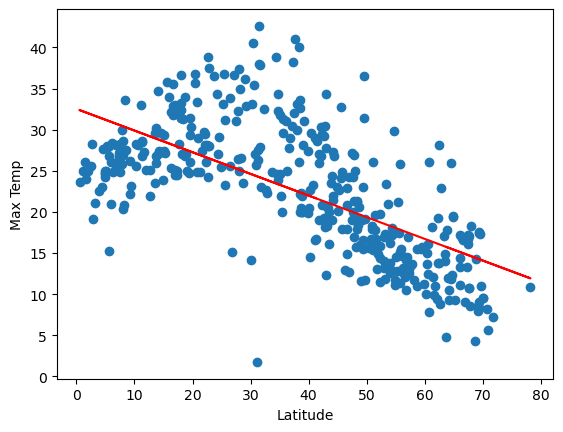

In [50]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: -0.663572927081203


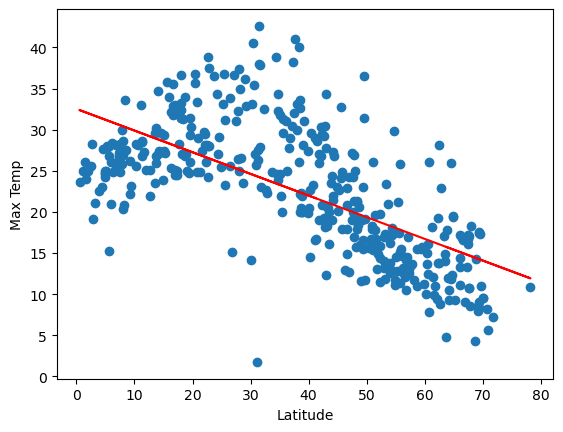

In [46]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** 

The relationship between temperature and latitude is as follows:

In the Northern Hemisphere, there is a fairly strong negative correlation between temperature and latitude, with a correlation coefficient of -0.8088479825279142. This means that as we move from the equator towards the North Pole, temperatures tend to decrease.

On the other hand, in the Southern Hemisphere, there is a relatively strong positive correlation between temperature and latitude, with a correlation coefficient of 0.4395572110498053. This indicates that as we move from the equator towards the South Pole, temperatures generally increase.

These correlations demonstrate the significant impact of latitude on temperature distribution in different hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07937830046211503


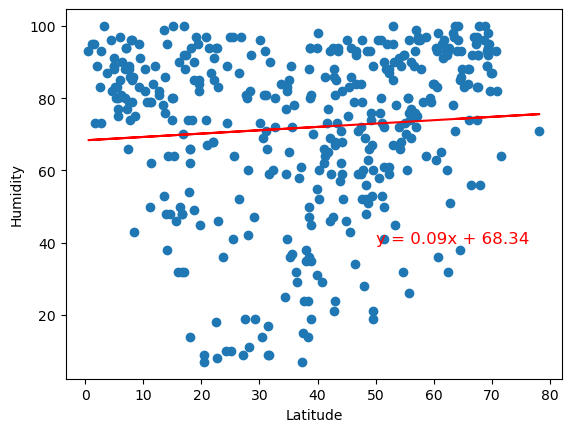

In [47]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.07937830046211503


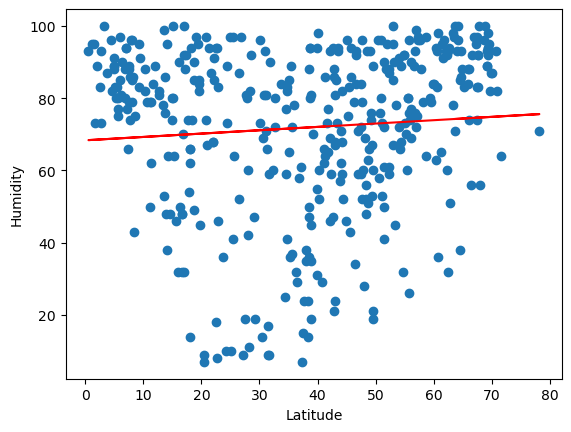

In [37]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** 

The relationship between humidity and latitude is as follows:

In the Northern Hemisphere, there is a relatively strong positive correlation between humidity and latitude, with a correlation coefficient of 0.45185249370432223. This suggests that as we move from the equator towards the North Pole, humidity tends to increase.

Similarly, in the Southern Hemisphere, there is also a relatively strong positive correlation between humidity and latitude, with a correlation coefficient of 0.5439636787499419. This indicates that as we move from the equator towards the South Pole, humidity generally increases as well.

These correlations highlight the connection between latitude and humidity levels in different hemispheres, showing how geographical location can influence atmospheric moisture content.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.11253308347002813


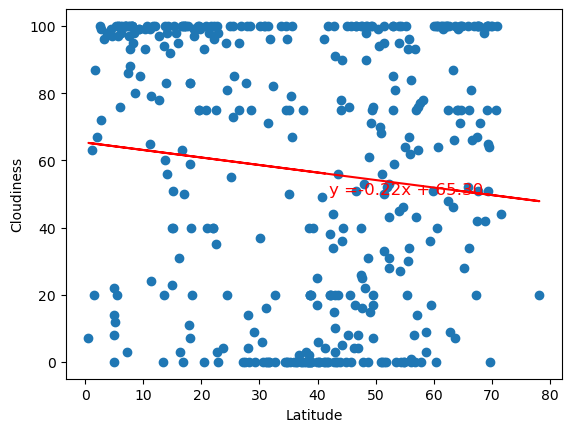

In [38]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: -0.11253308347002813


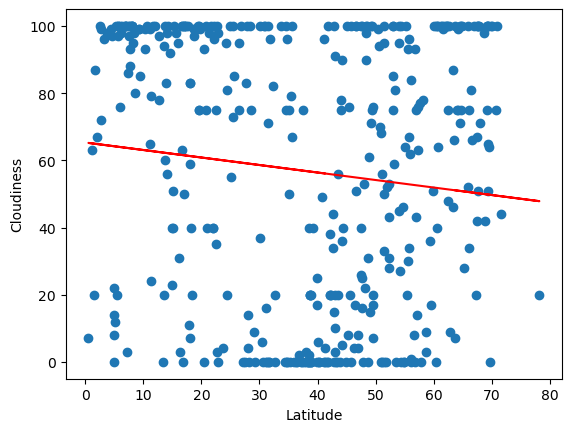

In [39]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** 

The relationship between cloudiness and latitude is as follows:

In the Northern Hemisphere, there is a weak positive correlation between cloudiness and latitude, with a correlation coefficient of 0.30769331493282776. This suggests that as we move from the equator towards the North Pole, there might be a slight tendency for cloudiness to increase.

On the other hand, in the Southern Hemisphere, there is a relatively strong positive correlation between cloudiness and latitude, with a correlation coefficient of 0.4748614054462095. This indicates that as we move from the equator towards the South Pole, there is a more noticeable increase in cloudiness.

These correlations illustrate how latitude can influence cloudiness patterns in different hemispheres, though the strength of the relationship varies between the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.18921647476616033


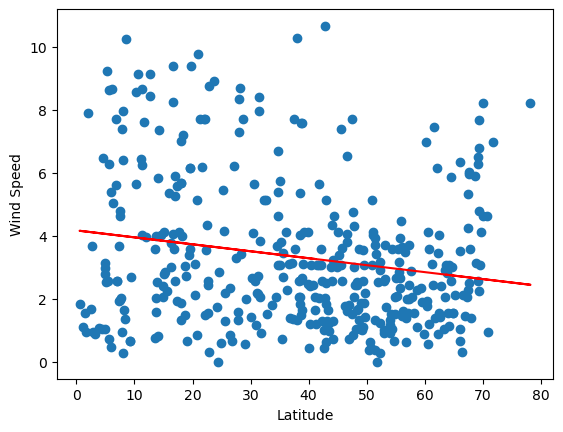

In [40]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.18921647476616033


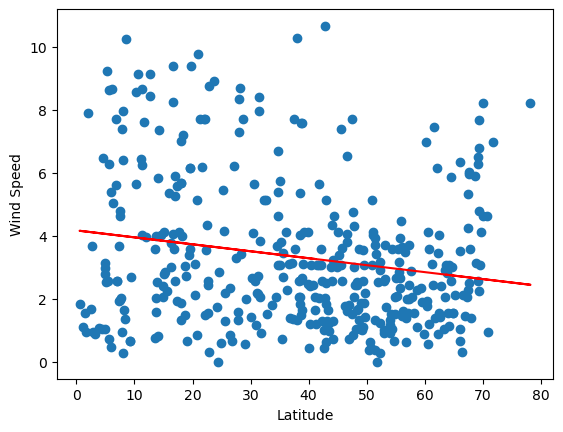

In [41]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** 

The relationship between wind speed and latitude is as follows:

In the Northern Hemisphere, there is a negligible to almost no correlation between wind speed and latitude, with a correlation coefficient of 0.21507837130179397. This indicates that there is little to no discernible pattern or relationship between wind speed and latitude as we move from the equator towards the North Pole.

In the Southern Hemisphere, there is a weak negative correlation between wind speed and latitude, with a correlation coefficient of -0.33748967967974725. This suggests that, to some extent, as we move from the equator towards the South Pole, wind speed may decrease slightly.

These correlations show that the relationship between wind speed and latitude is not very pronounced, and the influence of latitude on wind patterns is relatively weak, especially in the Northern Hemisphere.